In [1]:
%matplotlib inline
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np
from utilities import timestamps
from utilities.plotting import equi
from utilities.polygon_selection import get_node_data
from utilities.stats import calc_fmd_stats_with_mc
import matplotlib.pyplot as plt
from scipy import spatial
from matplotlib import colors, ticker, cm


In [2]:
bdf = pd.read_csv('radius_time_sweep_fm_main.csv')

In [3]:
def replace_unique_items(iterable, replace_with=None):
    """
    replaces items after the first unique item in a list
    with replace_with.
    
    ::default behavior::
    ----------------------------------
    In  : x = [1, 1, 2, 2]
    Out : replace_unique_items(x)
    [1, None, 2, None]
    """
    result = []
    for item in iterable:
        if item not in result:
            result.append(item)
        else:
            result.append(replace_with)
    return result

def plot_radius_time_sweep(dataframe, vertical_axis, value, figsize=(10, 7), **kwargs):
    """
    expects a dataframe with the following columns
    
    start_time : numpy.datetime64
    radius : float64 or int
    
    ::params::
    ----------------------------------
    dataframe : pandas.dataframe
    value : dataframe column header to be plotted as color map
    kwargs : any values that can be used with matplotlib.pyplot.pcolormesh
    
    ::dependencies::
    ----------------------------------
    matplotlib
    numpy
    pandas
    
    ::notes::
    ----------------------------------
    this could probably, and should probably, be generalized for any axis
    case. or at least such that the vertical axis is specified by the user
    """
    fig, ax = plt.subplots(figsize=figsize)
#     zi = dataframe.pivot(index='start_time', columns='radius', values=value)
    zi = dataframe.pivot(index='start_time', columns=vertical_axis, values=value)
    xi_label = [np.datetime64(z, 'Y').astype(str) for z in zi.index]
    xi = np.arange(len(xi_label))
    yi = zi.columns
    xi, yi = np.meshgrid(xi, yi)
    zi = np.ma.masked_invalid(zi).transpose()
    cbar = ax.pcolormesh(xi, yi, zi, **kwargs)
    fig.colorbar(cbar, label=str(value))
    
    xi_ticks = [i for i, j in  enumerate(replace_unique_items(xi_label)) if j is not None]
    xi_labels = [j for i, j in  enumerate(replace_unique_items(xi_label)) if j is not None]
    
    ax.set_xticks(xi_ticks)
    ax.set_xticklabels(xi_labels, rotation=90)
    
    ax.set_ylabel(vertical_axis)
    
    return fig, ax

/home/max/anaconda2/envs/research/lib/python3.6/site-packages/ipykernel/__main__.py:89: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
/home/max/anaconda2/envs/research/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


<a list of 5 text.Text objects>

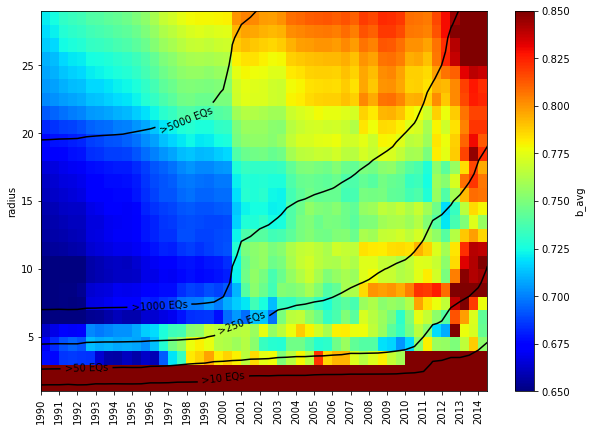

In [4]:
fig, ax = plot_radius_time_sweep(dataframe=bdf, vertical_axis='radius'
                                 , value='b_avg', vmin=0.65, vmax=0.85, cmap='jet')

zi = bdf.pivot(index='start_time', columns='radius', values='n_avg')
xi_label = [np.datetime64(z, 'Y') for z in zi.index]
xi = np.arange(len(xi_label))
yi = zi.columns
xi, yi = np.meshgrid(xi, yi)

zi = np.ma.masked_invalid(zi).transpose()


# from scipy.ndimage.filters import gaussian_filter
# zi = gaussian_filter(zi, .50)

# cs = ax.contour(xi,yi,zi, 80, colors='black', locator=ticker.LogLocator())
levels = [10, 50, 250, 1000, 5000]
cs = ax.contour(xi,yi,zi, levels, colors='black')#, locator=ticker.LogLocator())

cs.levels = ['>10 EQs', '>50 EQs','>250 EQs', '>1000 EQs', '>5000 EQs']

# ax.clabel(cs, cs.levels, inline=True, manual=[(25, 2), (25,3),(25, 5), (25, 12),  (17, 25)])
ax.clabel(cs, cs.levels, inline=True)


In [12]:
from itertools import product

In [36]:
r = np.arange(1,25,0.5)
dt = pd.date_range(start='2000', end='2010', freq='m')
data = [x for x in product(r,dt)]

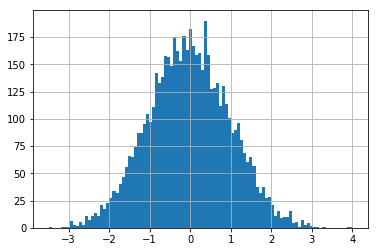

In [37]:
test_df_1 = pd.DataFrame(data, columns=['radius', 'start_time'])
test_df_1['b_avg'] = np.random.normal(loc=0., size=test_df_1.shape[0])
test_df_1.b_avg.hist(bins=100)

(<matplotlib.figure.Figure at 0x7fb129af0470>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb129beeac8>)

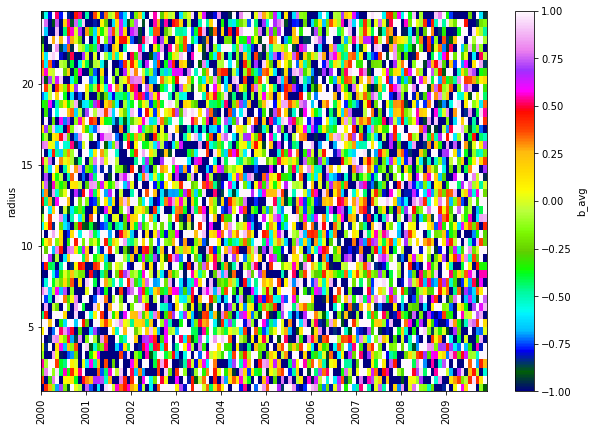

In [51]:
plot_radius_time_sweep(dataframe=test_df_1, vertical_axis='radius', value='b_avg', vmin=-1, vmax=1, cmap='gist_ncar')